In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import RocCurveDisplay


**Importing the dataset**

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.drop(['User ID'],axis='columns',inplace=True)

In [6]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [9]:
from sklearn.model_selection import train_test_split
X=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [11]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(max_depth=55,n_estimators=4)
rc.fit(X_train,y_train)


RandomForestClassifier(max_depth=55, n_estimators=4)

**Predicting the Test set results**

In [12]:
y_pred=rc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

**Making the Confusion Matrix**

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[57,  3],
       [11, 29]])

In [15]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,57,3,60
1,11,29,40
All,68,32,100


**Visualising the Training set results**

Trainingcscore:97.66666666666667


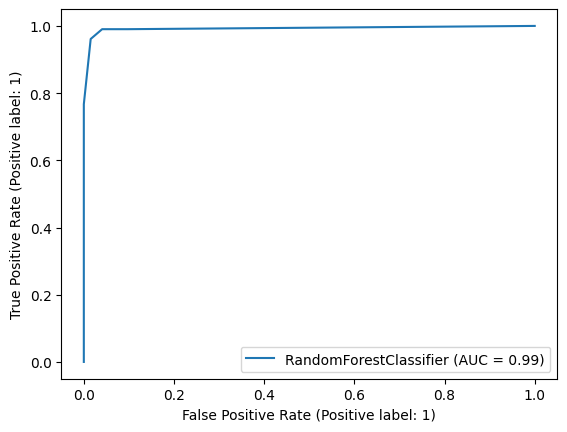

In [17]:

train_score=rc.score(X_train,y_train)*100
print(f'Trainingcscore:{train_score}')
RocCurveDisplay.from_estimator(rc,X_train,y_train)

**Visualising the Test set results**

Test score:100.0


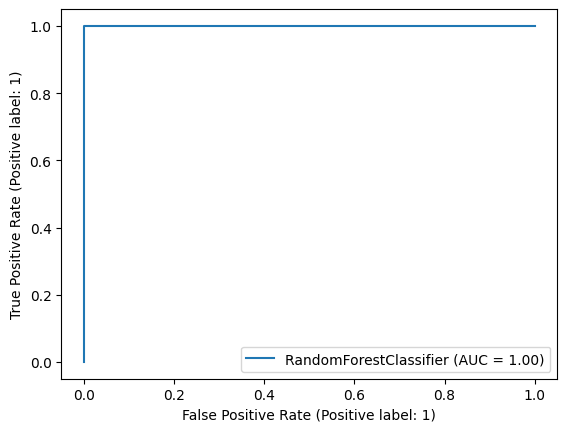

In [18]:
test_score=rc.score(X_test,y_pred)*100
print(f'Test score:{test_score}')
RocCurveDisplay.from_estimator(rc,X_test,y_pred)